In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import bokeh.mpl
import bokeh.plotting

%load_ext autoreload
%autoreload 1
%matplotlib inline
%config InlineBackend.figure_formats = {'jpg', 'retina'}

# Plotting Parameters

In [2]:
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 10,
      'figure.figsize': (8, 4),
      'axes.titlesize': 10, 
      'axes.facecolor': 'DFDFE5',
      'axes.linecolor': 'white'}

sns.set_context('notebook', rc=rc)
sns.set_style('whitegrid', rc=rc)
bokeh.io.output_notebook()

Loading BokehJS ...

# Helpers

In [3]:
def merge_train_val(path_train, path_val):
    train = pd.read_csv(path_train)
    val = pd.read_csv(path_val)
    val = val.rename(columns={'checkpoint': 'Step'})
    merged_train_val = pd.merge(train, val, on='Step')
    merged_train_val = merged_train_val.rename(columns={'Value': 'train', 'digit_accuracy': 'valid'})
    return merged_train_val[['Step', 'train', 'valid']]

#  Load and Merge Training/Validation

In [4]:
train_001_path = "../results/grayscale001/train-grayscale001.csv"
val_001_path = "../results/grayscale001/valid-grayscale001.csv"
lr_001 = merge_train_val(train_001_path, val_001_path)

train_0001_path = "../results/grayscale0001/train-grayscale0001.csv"
val_0001_path = "../results/grayscale0001/valid-grayscale0001.csv"
lr_0001 = merge_train_val(train_0001_path, val_0001_path)

train_00001_path = "../results/grayscale00001/train-grayscale00001.csv"
val_00001_path = "../results/grayscale00001/valid-grayscale00001.csv"
lr_00001 = merge_train_val(train_00001_path, val_00001_path)

# Evaluate @ Learning Rate .001

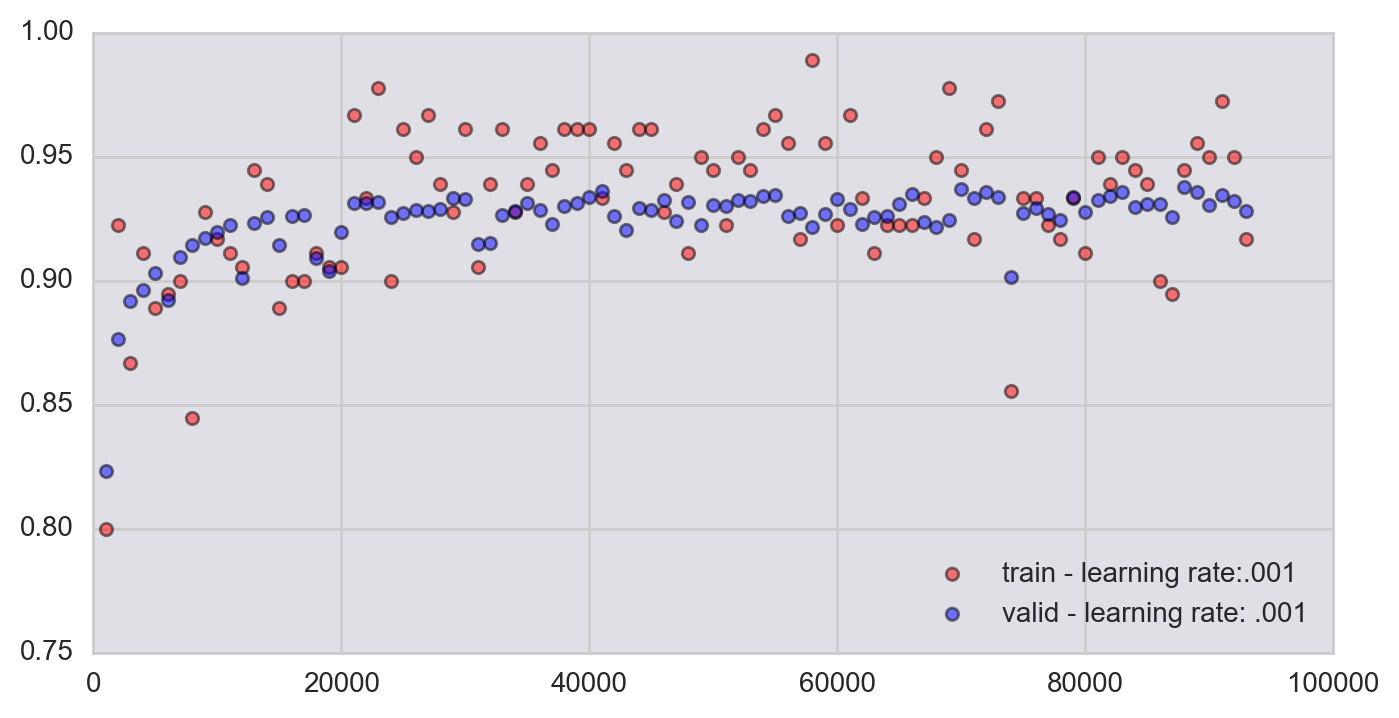

In [5]:
plt.scatter(lr_001['Step'], lr_001['train'], label='train - learning rate:.001', marker='o', linewidth=1, c='red', alpha=.5)
plt.scatter(lr_001['Step'], lr_001['valid'], label='valid - learning rate: .001', marker='o', linewidth=1, c='blue', alpha=.5)
plt.xlim(0)
plt.ylim(.75, 1.00)
plt.legend(loc='lower right');

In [6]:
lr_001.sort_values(by='train', ascending=False).head()

,Step,train,valid
57,58000,0.988889,0.921626
22,23000,0.977778,0.931506
68,69000,0.977778,0.924597
90,91000,0.972222,0.934307
72,73000,0.972222,0.933560


# Evaluate @ Learning Rate .0001

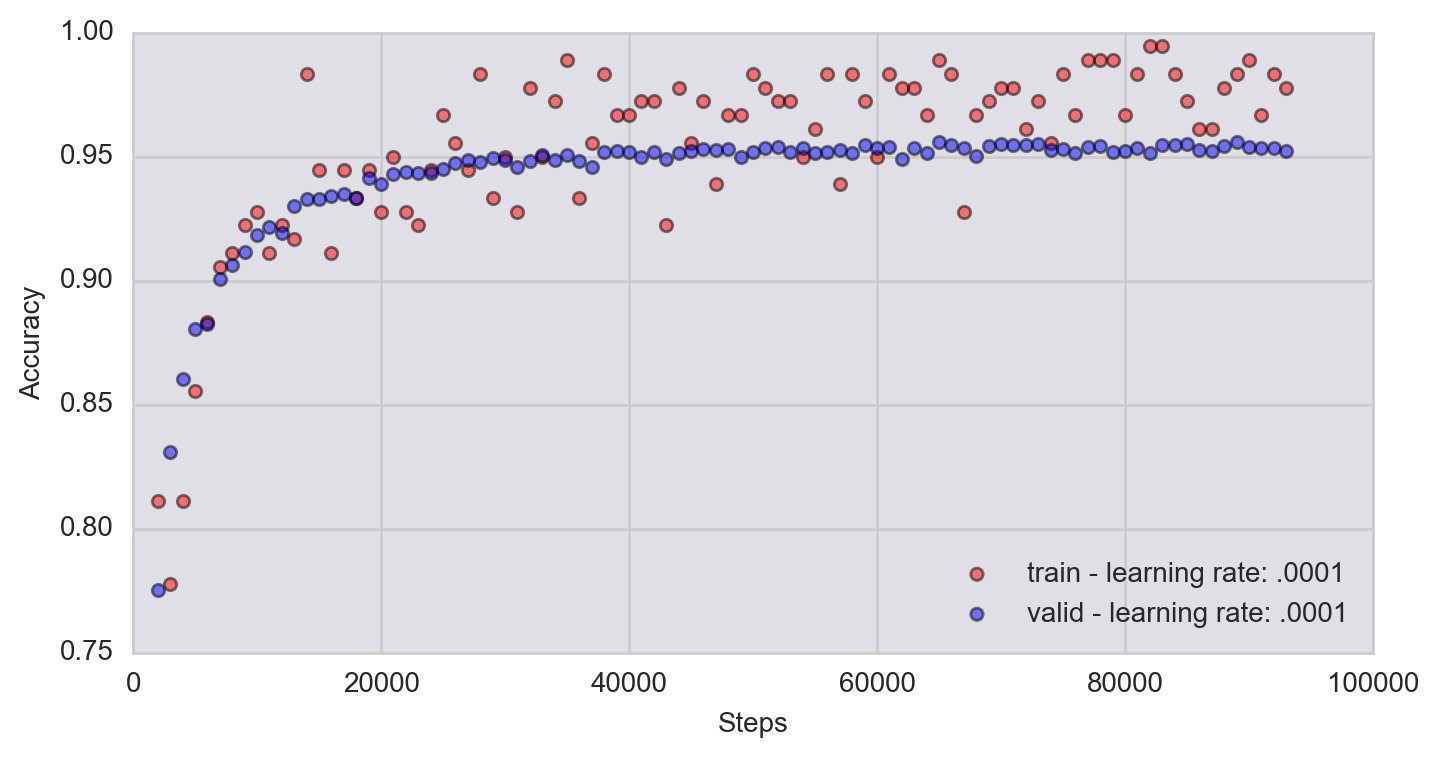

In [12]:
plt.scatter(lr_0001['Step'], lr_0001['train'], label='train - learning rate: .0001', marker='o', linewidth=1, c='red', alpha=.5)
plt.scatter(lr_0001['Step'], lr_0001['valid'], label='valid - learning rate: .0001', marker='o', linewidth=1, c='blue', alpha=.5)

plt.xlim(0)
plt.ylim(.75, 1.00)
plt.legend(loc='lower right')
plt.xlabel("Steps")
plt.ylabel("Accuracy");

In [8]:
lr_0001.sort_values(by='valid', ascending=False).head()

,Step,train,valid
64,65000,0.988889,0.955950
88,89000,0.983333,0.955678
69,70000,0.977778,0.955203
84,85000,0.972222,0.954965
72,73000,0.972222,0.954880


# Evaluate @ Learning Rate .00001

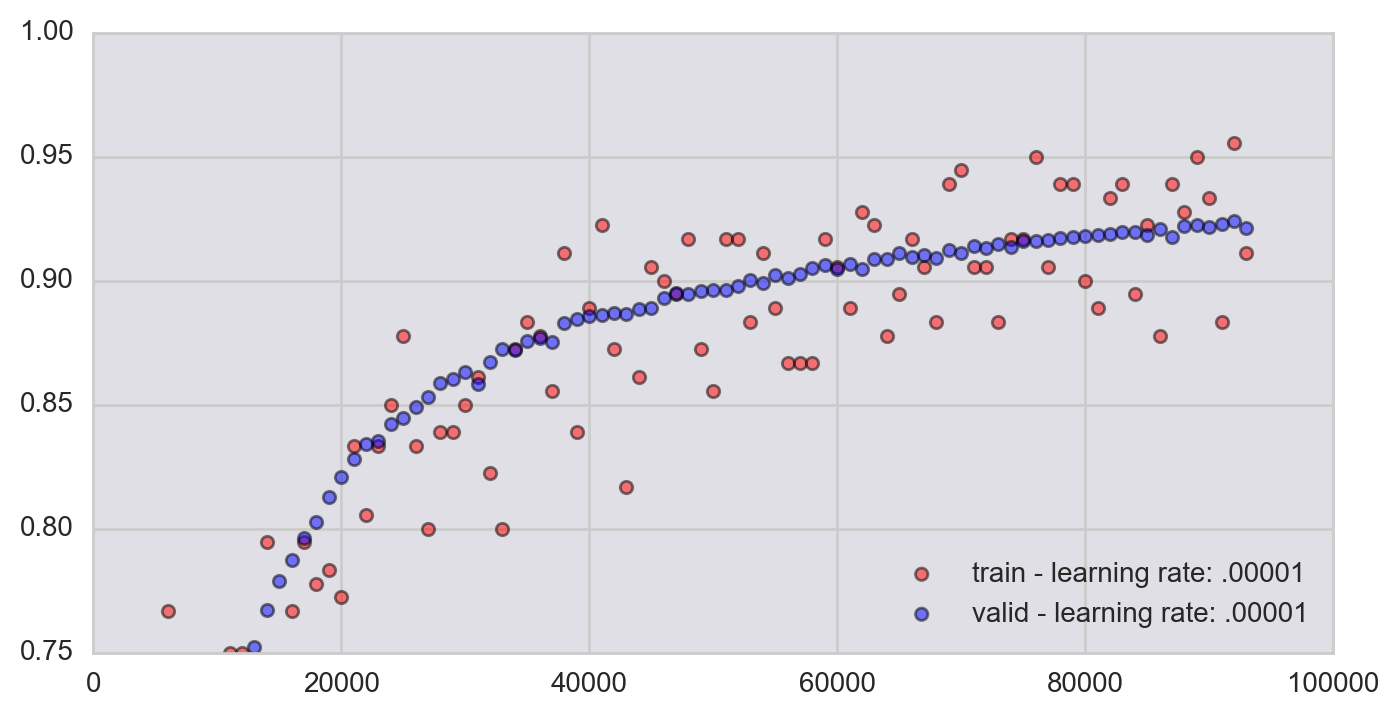

In [9]:
plt.scatter(lr_00001['Step'], lr_00001['train'], label='train - learning rate: .00001', marker='o', linewidth=1, c='red', alpha=.5)
plt.scatter(lr_00001['Step'], lr_00001['valid'], label='valid - learning rate: .00001', marker='o', linewidth=1, c='blue', alpha=.5)
plt.xlim(0)
plt.ylim(.75, 1.00)
plt.legend(loc='lower right');

In [10]:
lr_00001.sort_values(by='valid', ascending=False).head()

,Step,train,valid
91,92000,0.955556,0.923833
90,91000,0.883333,0.922679
88,89000,0.950000,0.922458
87,88000,0.927778,0.922101
89,90000,0.933333,0.921779
